<a href="https://colab.research.google.com/github/VladislavaSilisiada/Sales_Analytics/blob/main/Sales_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium
import seaborn as sns

/bin/bash: line 1: conda: command not found


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd /content/drive/MyDrive/13. Final project

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/13. Final project


In [ ]:
# Show the first 5 rows of the main df - events
ev = pd.read_csv("events.csv")
ev.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


In [ ]:
# Get df info and check NaN values
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
# Show 5 rows of products df
pr = pd.read_csv("products.csv")
print(pr)

      id        item_type
0   2103           Cereal
1   7940        Household
2   2455          Clothes
3   1270        Beverages
4   8681  Office Supplies
5   4594           Fruits
6   5988       Vegetables
7   7331        Baby Food
8   8875             Meat
9   8293        Cosmetics
10  8969           Snacks
11  3127    Personal Care


In [ ]:
# Show 5 rows of regions df
reg = pd.read_csv("countries.csv")
print(reg)

                  name alpha-2 alpha-3   region          sub-region
0          Afghanistan      AF     AFG     Asia       Southern Asia
1        Åland Islands      AX     ALA   Europe     Northern Europe
2              Albania      AL     ALB   Europe     Southern Europe
3              Algeria      DZ     DZA   Africa     Northern Africa
4       American Samoa      AS     ASM  Oceania           Polynesia
..                 ...     ...     ...      ...                 ...
244  Wallis and Futuna      WF     WLF  Oceania           Polynesia
245     Western Sahara      EH     ESH   Africa     Northern Africa
246              Yemen      YE     YEM     Asia        Western Asia
247             Zambia      ZM     ZMB   Africa  Sub-Saharan Africa
248           Zimbabwe      ZW     ZWE   Africa  Sub-Saharan Africa

[249 rows x 5 columns]


In [ ]:
# Checking missing values in ev
ev.isna().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Order Priority,0
Country Code,82
Product ID,0
Sales Channel,0
Units Sold,2
Unit Price,0
Unit Cost,0


In [ ]:
# check percentage of missing values from the whole df
print(ev.isna().sum() / ev.shape[0] * 100)

Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
# Checking missing values in pr
pr.isna().sum()

,0
id,0
item_type,0


In [ ]:
# Checking missing values in reg
reg.isna().sum()
# заповнимо порожні рядки текстом 'Uknown'

,0
name,0
alpha-2,1
alpha-3,0
region,1
sub-region,1


In [ ]:
#check percentage of missing values from the whole df
print(reg.isna().sum() / reg.shape[0] * 100)

name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


In [ ]:
# Fill the rows with NaN values
ev["Country Code"] = ev['Country Code'].fillna("Uknown")

In [ ]:
# Fill the rows with NaN values
ev["Units Sold"] = ev['Units Sold'].fillna(ev['Units Sold'].mean())

In [ ]:
# Check
print(ev.isna().sum())

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


In [ ]:
# Checking non-null cnt
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1330 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1330 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
# Fill the rows with NaN values
reg["name"] = reg["name"].str.replace("NaN", 'Uknown')

In [ ]:
# Checking non-null cnt
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
# Formaiting rhe columns with time information
ev['Order Date'] = pd.to_datetime(ev['Order Date'])

In [ ]:
ev['Ship Date'] = pd.to_datetime(ev['Ship Date'])

In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


In [ ]:
# Check dublicates
print(ev.duplicated().sum())

0


In [ ]:
# Check dublicates
print(pr.duplicated().sum())

0


In [ ]:
# Check dublicates
print(reg.duplicated().sum())

0


In [ ]:
# Anomaly check in the metrics
ev.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4958.000000,154.060000,97.440000
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000
std,2.573882e+08,NaN,NaN,2820.728878,2903.012170,217.323460,176.158873


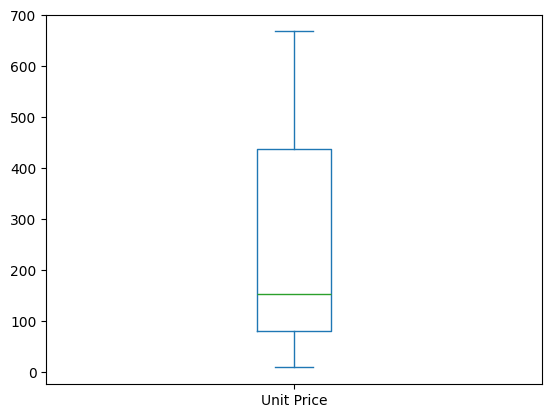

In [ ]:
# Creating a visualisation to show value distribution and check for an anomaly
ev['Unit Price'].plot(kind='box')
plt.show()

### Огляд даних

*   Було виявлено пропуски в таблицях **events** та **regions**, здебільшого в комірках з даними про країни. Так як доля пропусків сягала 6% я вирішила не видаляти рядки з відсутніми даними, а замінити їх текстом "Uknown". Також в таблиці **regions** я заповнила порожні комірки текстом "Uknown". Надалі ми будемо використовувати це як окрему категорію в аналізі.

*  В колонці Units sold замінимо порожні рядки середнім значенням.

*  Відформатувала колонки *Order Date* та *Ship Date* до типу даних datetime.

* Дублікатів не виявлено

* Для виявлення аномалій я спочатку відобразила основні статистичні метрики за допомогою функції describe. Виявлено значну різницю між середнім значенням і медіаною (50%) приблизно у два рази що може свідчити про наявність "хвоста" у розподілі. Задля додаткового огляду було створено візуалізацію (boxplot), яка показує розподіл значення в нормальному діапазоні та можливі викиди через позначки. Отже, за графіком не виявлено чітких аномалій. Водночас наявність дорогих товарів серед великої кількості бюджетних позицій( діапазон 80-420) зміщує розрахунок середнього значення у метриках.

In [ ]:
# Renaming the columns for data joining
pr.rename(columns={'id':'Product ID'}, inplace=True)
pr.head()

,Product ID,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


In [ ]:
# Renaming the columns for data joining
reg.rename(columns={'alpha-3':'Country Code'}, inplace=True)
reg.head()

,name,alpha-2,Country Code,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


In [ ]:
# Add the needed columns to the main table
events = pd.merge(ev, pr, how='left', on='Product ID')
events = pd.merge(events, reg, how='left', on='Country Code')
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Uknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN,NaN
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
# Fill the missing values
events = events.fillna("Uknown")

In [ ]:
# Check the missing values
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe
2,101025998,2014-07-18,2014-08-11,M,Uknown,7940,Online,4693.0,668.27,502.54,Household,Uknown,Uknown,Uknown,Uknown
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe


In [ ]:
# Create the revenue column
events["revenue"] = events['Units Sold'] * events['Unit Price']
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region,revenue
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.00
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,409960.10
2,101025998,2014-07-18,2014-08-11,M,Uknown,7940,Online,4693.0,668.27,502.54,Household,Uknown,Uknown,Uknown,Uknown,3136191.11
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,127966.88
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,362897.60


In [ ]:
# Show basic metrics
events.describe()

,Order ID,Order Date,Ship Date,Product ID,Units Sold,Unit Price,Unit Cost,revenue
count,1.330000e+03,1330,1330,1330.000000,1330.000000,1330.000000,1330.000000,1.330000e+03
mean,5.412048e+08,2013-10-12 06:09:12.180451072,2013-11-06 00:46:33.383458816,5788.096241,4952.201807,264.893541,187.246812,1.281672e+06
min,1.006406e+08,2010-01-01 00:00:00,2010-01-10 00:00:00,1270.000000,2.000000,9.330000,6.920000,5.038200e+02
25%,3.190004e+08,2011-12-16 06:00:00,2012-01-03 00:00:00,3127.000000,2360.750000,81.730000,35.840000,2.665647e+05
50%,5.387164e+08,2013-10-17 00:00:00,2013-11-09 00:00:00,5988.000000,4958.000000,154.060000,97.440000,7.613049e+05
75%,7.544628e+08,2015-08-28 18:00:00,2015-10-03 18:00:00,8681.000000,7458.750000,437.200000,263.330000,1.743428e+06
max,9.998797e+08,2017-07-23 00:00:00,2017-08-31 00:00:00,8969.000000,9999.000000,668.270000,524.960000,6.672676e+06
std,2.573882e+08,NaN,NaN,2820.728878,2903.012170,217.323460,176.158873,1.443146e+06


In [ ]:
# Find the total revenue
events["revenue"].sum()

np.float64(1704623436.0841565)

In [ ]:
events['Units Sold'].sum()

np.float64(6586428.403614458)

In [ ]:
# Count of orders in countries
countries = events["name"].value_counts()
print(countries)

name
Uknown                    82
San Marino                40
Andorra                   40
Romania                   34
Ukraine                   33
Bosnia and Herzegovina    33
Russia                    32
Malta                     32
Greece                    32
Macedonia                 32
Czech Republic            31
Slovakia                  30
Bulgaria                  30
Norway                    30
Cyprus                    30
Italy                     30
Ireland                   30
Armenia                   29
Serbia                    29
Sweden                    29
Austria                   28
Montenegro                28
Belarus                   28
Luxembourg                28
Switzerland               28
Poland                    28
Slovenia                  27
Latvia                    27
Spain                     26
France                    26
Belgium                   26
Denmark                   26
Germany                   26
Portugal                  25
Hungary  

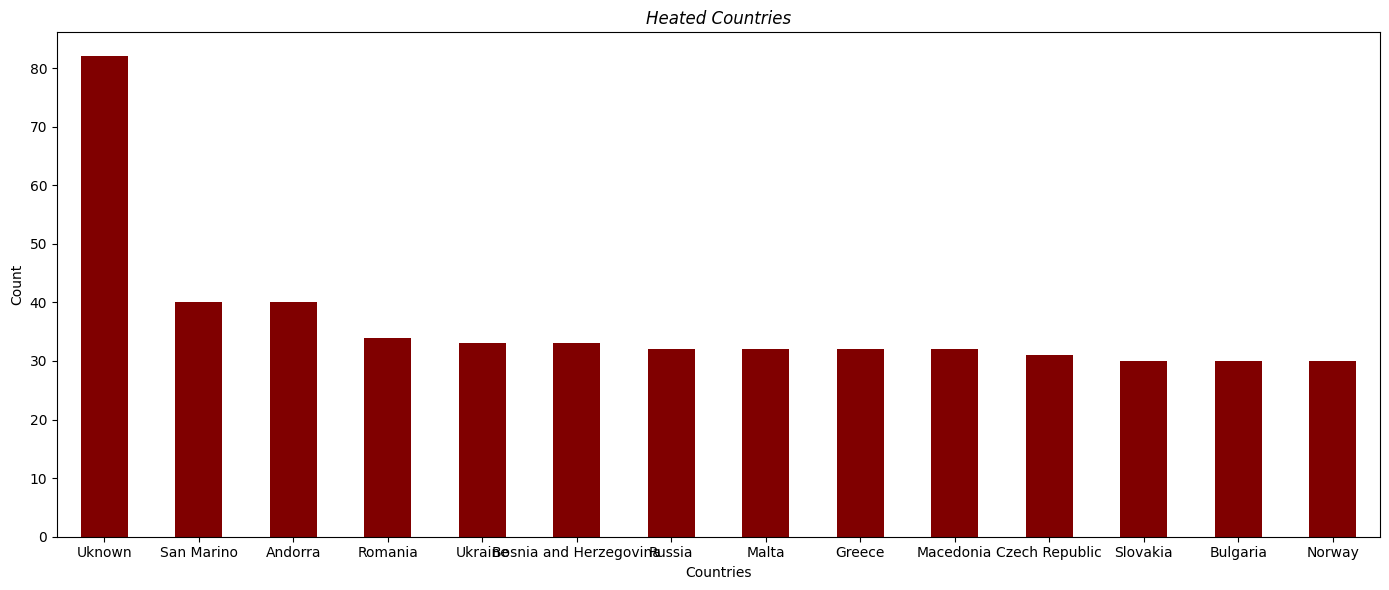

In [ ]:
# Visualising 14 countries with the most orders
plt.figure(figsize=(14, 6))
countries.head(14).plot(kind="bar", color="Maroon", fontsize=10)
plt.title("Heated Countries", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Heated countries overall
countries_sum = countries.count()
print(countries_sum)

46


In [ ]:
# Count of orders in regions
regions_cnt = events["region"].value_counts()
print(regions_cnt)

region
Europe    1166
Uknown      82
Asia        82
Name: count, dtype: int64


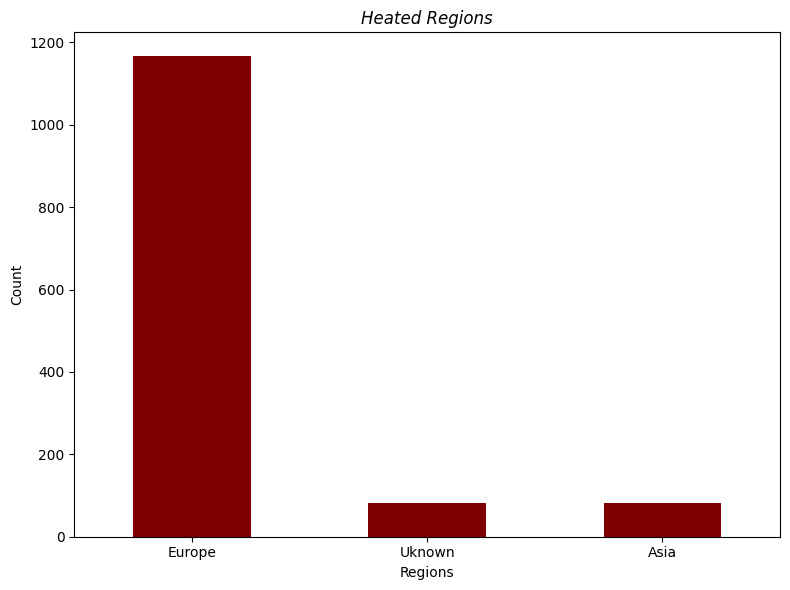

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
regions_cnt.plot(kind="bar", color="Maroon", fontsize=10)
plt.title("Heated Regions", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Count of orders in sub-regions
sub_reg = events["sub-region"].value_counts()
print(sub_reg)

sub-region
Southern Europe    413
Eastern Europe     271
Northern Europe    259
Western Europe     223
Uknown              82
Western Asia        82
Name: count, dtype: int64


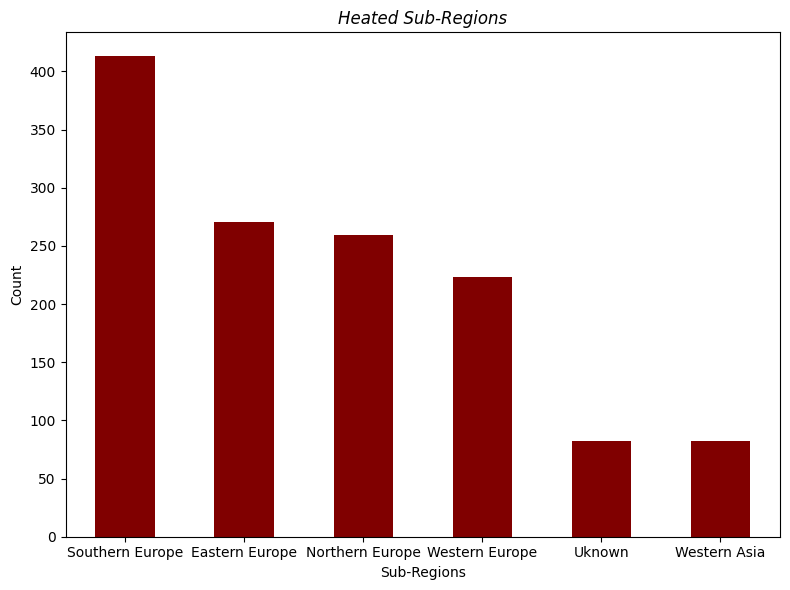

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
sub_reg.plot(kind="bar", color="Maroon", fontsize=10)
plt.title("Heated Sub-Regions", fontstyle="italic")
plt.xlabel("Sub-Regions")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Count of orders by categories
categories_pop = events.groupby("item_type")["Product ID"].count().sort_values(ascending=False)
print(categories_pop)

item_type
Office Supplies    123
Beverages          121
Personal Care      115
Cosmetics          114
Vegetables         114
Fruits             112
Baby Food          112
Meat               111
Clothes            105
Cereal             103
Snacks             103
Household           97
Name: Product ID, dtype: int64


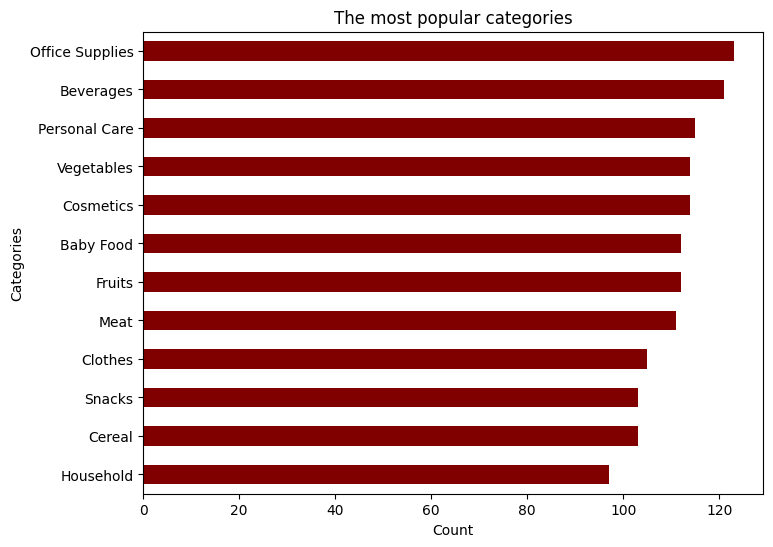

In [ ]:
# Vis
plt.figure(figsize=(8, 6))
categories_pop.sort_values(ascending=True).plot(kind="barh", color="Maroon")
plt.title("The most popular categories")
plt.xlabel("Count")
plt.ylabel("Categories")
plt.show()

In [ ]:
# Sum of sold units by categories
categories_sold = events.groupby("item_type")["Units Sold"].sum().sort_values(ascending=False)
print(categories_sold)

item_type
Office Supplies    617641.000000
Beverages          613133.000000
Fruits             591672.000000
Clothes            591385.000000
Vegetables         582544.000000
Baby Food          562706.000000
Personal Care      562630.201807
Meat               535332.201807
Cosmetics          533291.000000
Snacks             490160.000000
Cereal             465685.000000
Household          440249.000000
Name: Units Sold, dtype: float64


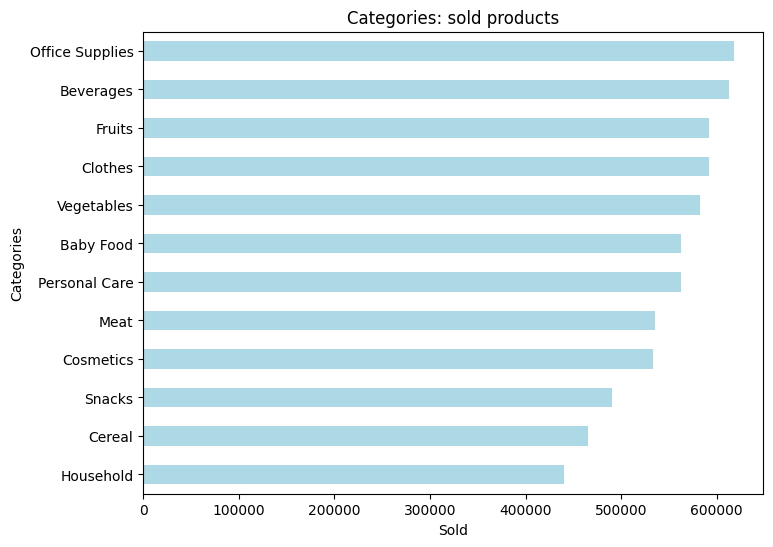

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
categories_sold.sort_values(ascending=True).plot(kind="barh", color="LightBlue")
plt.title("Categories: sold products")
plt.xlabel("Sold")
plt.ylabel("Categories")
plt.show()

In [ ]:
# Sum of cost by categories
categories_cost = events.groupby("item_type")["Unit Cost"].sum().sort_values(ascending=False)
print(categories_cost)

item_type
Office Supplies    64570.08
Household          48746.38
Meat               40480.59
Cosmetics          30019.62
Baby Food          17855.04
Cereal             12062.33
Vegetables         10366.02
Snacks             10036.32
Personal Care       6517.05
Beverages           3846.59
Clothes             3763.20
Fruits               775.04
Name: Unit Cost, dtype: float64


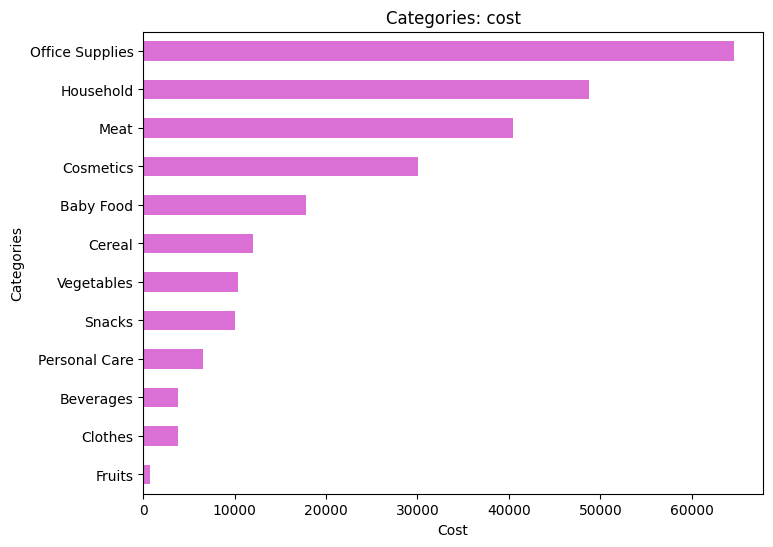

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
categories_cost.sort_values(ascending=True).plot(kind="barh", color="Orchid")
plt.title("Categories: cost")
plt.xlabel("Cost")
plt.ylabel("Categories")
plt.show()

In [ ]:
# Sum of price by categories
categories_price = events.groupby("item_type")["Unit Price"].sum().sort_values(ascending=False)
print(categories_price)

item_type
Office Supplies    80098.83
Household          64822.19
Cosmetics          49840.80
Meat               46829.79
Baby Food          28591.36
Cereal             21187.10
Vegetables         17562.84
Snacks             15715.74
Clothes            11474.40
Personal Care       9398.95
Beverages           5741.45
Fruits              1044.96
Name: Unit Price, dtype: float64


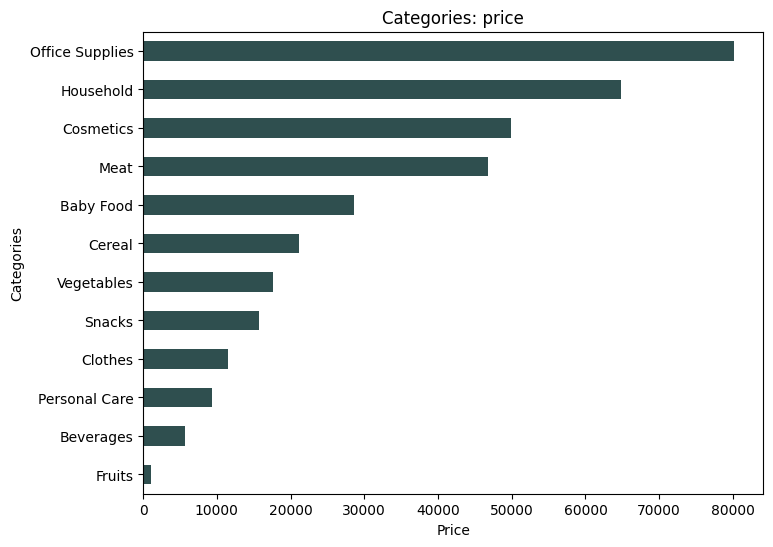

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
categories_price.sort_values(ascending=True).plot(kind="barh", color="DarkSlateGrey")
plt.title("Categories: price")
plt.xlabel("Price")
plt.ylabel("Categories")
plt.show()

In [ ]:
# Categories revenue
categories_rev = events.groupby("item_type")["revenue"].sum().sort_values(ascending=False)
print(categories_rev)

item_type
Office Supplies    4.022140e+08
Household          2.942052e+08
Cosmetics          2.331548e+08
Meat               2.258513e+08
Baby Food          1.436476e+08
Cereal             9.579140e+07
Vegetables         8.974673e+07
Snacks             7.478861e+07
Clothes            6.462655e+07
Personal Care      4.598377e+07
Beverages          2.909316e+07
Fruits             5.520300e+06
Name: revenue, dtype: float64


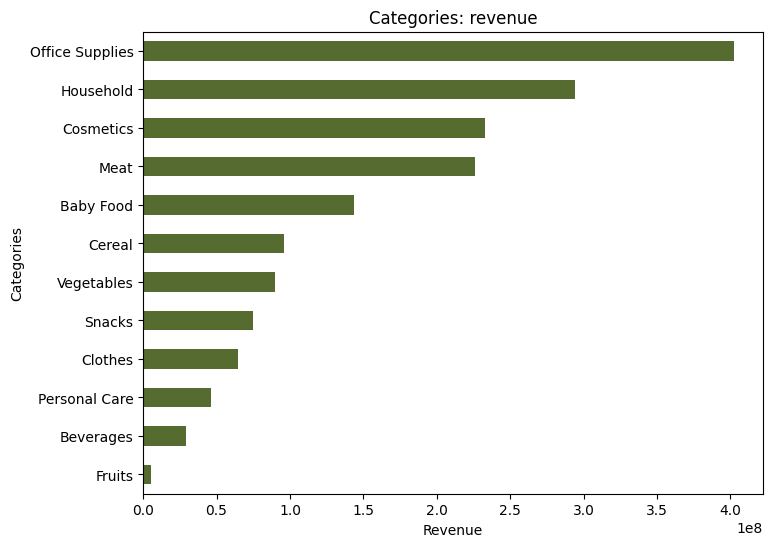

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
categories_rev.sort_values(ascending=True).plot(kind="barh", color="DarkOliveGreen")
plt.title("Categories: revenue")
plt.xlabel("Revenue")
plt.ylabel("Categories")
plt.show()

In [ ]:
# Revenue by countries
countries_rev = events.groupby("name")["revenue"].sum().sort_values(ascending=False)
print(countries_rev)

name
Uknown                    1.031456e+08
Czech Republic            5.354393e+07
Ukraine                   5.325232e+07
Bosnia and Herzegovina    5.011751e+07
Macedonia                 4.922209e+07
San Marino                4.788371e+07
Andorra                   4.775669e+07
Portugal                  4.717219e+07
Malta                     4.714532e+07
Russia                    4.605166e+07
Slovakia                  4.294100e+07
Hungary                   4.240825e+07
Serbia                    4.219354e+07
France                    3.936211e+07
Slovenia                  3.889253e+07
Latvia                    3.872208e+07
Greece                    3.869954e+07
Bulgaria                  3.816156e+07
Germany                   3.805509e+07
Armenia                   3.751984e+07
Italy                     3.587835e+07
Austria                   3.574087e+07
Sweden                    3.548213e+07
Romania                   3.428615e+07
Belarus                   3.423626e+07
Poland              

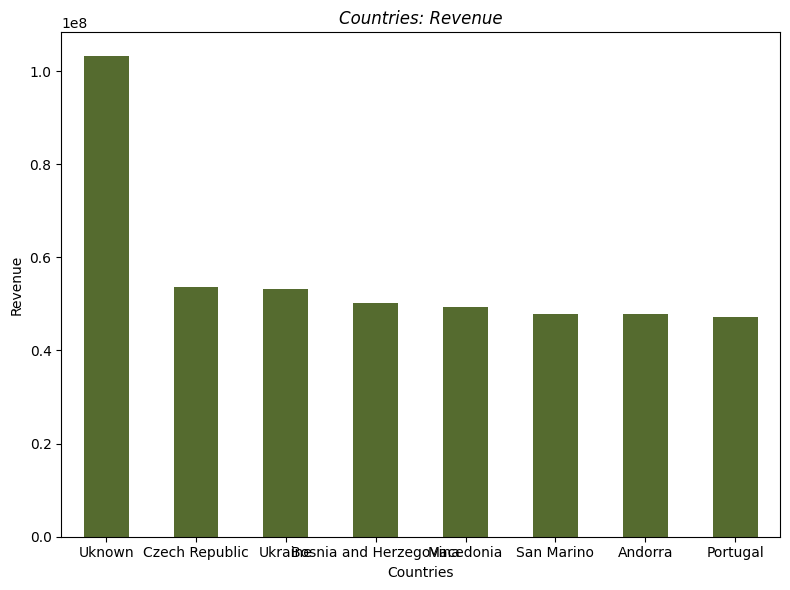

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
countries_rev.head(8).plot(kind="bar", color="DarkOliveGreen", fontsize=10)
plt.title("Countries: Revenue", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of cost by countries
countries_cost = events.groupby("name")["Unit Cost"].sum().sort_values(ascending=False)
print(countries_cost)

name
Uknown                    16474.53
Czech Republic             7999.01
Bosnia and Herzegovina     7485.24
Ukraine                    7220.69
San Marino                 7157.86
Slovakia                   6942.71
Bulgaria                   6751.54
Andorra                    6724.50
Portugal                   6506.19
Macedonia                  5995.33
Russia                     5900.22
Malta                      5810.52
Poland                     5683.99
France                     5613.81
Lithuania                  5575.68
Norway                     5555.43
Austria                    5489.81
Sweden                     5454.06
Greece                     5450.20
Armenia                    5392.06
Latvia                     5379.39
Romania                    5317.08
Germany                    5150.39
Albania                    4981.85
Montenegro                 4931.83
Switzerland                4894.20
Luxembourg                 4844.84
Serbia                     4723.92
Netherlands    

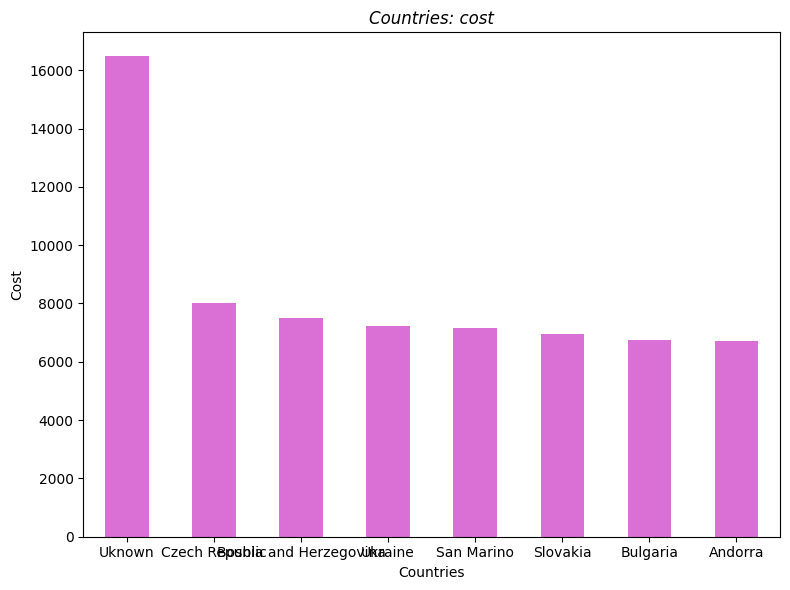

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
countries_cost.head(8).plot(kind="bar", color="Orchid", fontsize=10)
plt.title("Countries: cost", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Cost")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of sold units by countries
countries_sold = events.groupby("name")["Units Sold"].sum().sort_values(ascending=False)
print(countries_sold)

name
Uknown                    404853.000000
Macedonia                 203078.000000
San Marino                192228.000000
Andorra                   185686.000000
Greece                    176859.000000
Malta                     173641.000000
Serbia                    170369.000000
Romania                   166882.000000
Russia                    165954.000000
Ukraine                   164577.000000
Cyprus                    158743.000000
Italy                     156781.000000
Slovenia                  156479.000000
Bosnia and Herzegovina    153545.000000
Belarus                   153432.000000
Hungary                   152242.000000
Armenia                   150665.000000
Latvia                    150525.000000
Bulgaria                  150088.000000
Austria                   145573.000000
Switzerland               144320.000000
Czech Republic            142446.000000
Ireland                   140340.000000
Norway                    138106.000000
Montenegro                137200.00

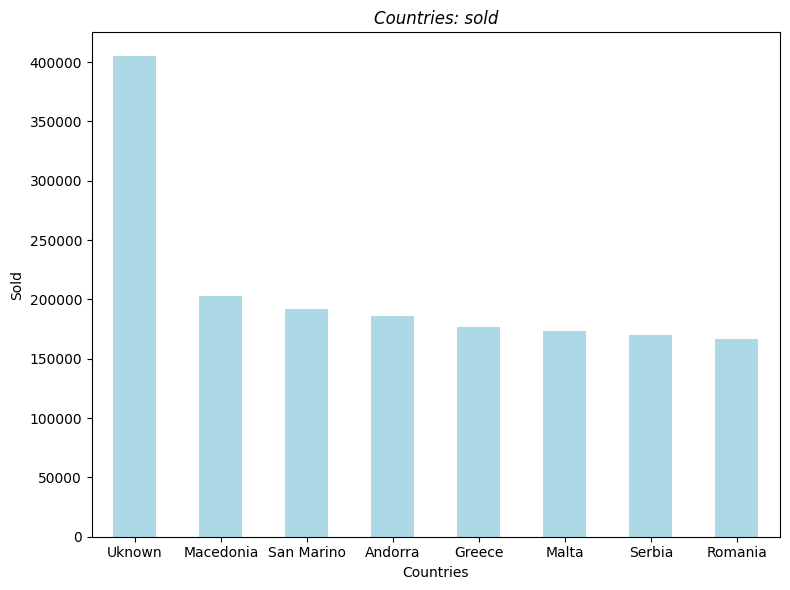

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
countries_sold.head(8).plot(kind="bar", color="LightBlue", fontsize=10)
plt.title("Countries: sold", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of price by countries
countries_price = events.groupby("name")["Unit Price"].sum().sort_values(ascending=False)
print(countries_price)

name
Uknown                    22607.37
Czech Republic            10671.72
Bosnia and Herzegovina    10296.05
Ukraine                   10262.86
San Marino                10194.71
Andorra                    9774.25
Slovakia                   9668.70
Bulgaria                   9186.19
Portugal                   8876.31
Russia                     8497.93
Malta                      8379.80
Macedonia                  8317.34
Poland                     8279.65
Norway                     7962.68
Sweden                     7960.12
Greece                     7774.34
Lithuania                  7620.46
France                     7570.93
Austria                    7514.99
Montenegro                 7446.54
Armenia                    7350.76
Latvia                     7325.21
Romania                    7314.62
Germany                    7222.32
Switzerland                7160.94
Albania                    7085.98
Luxembourg                 6989.81
Ireland                    6756.66
Serbia         

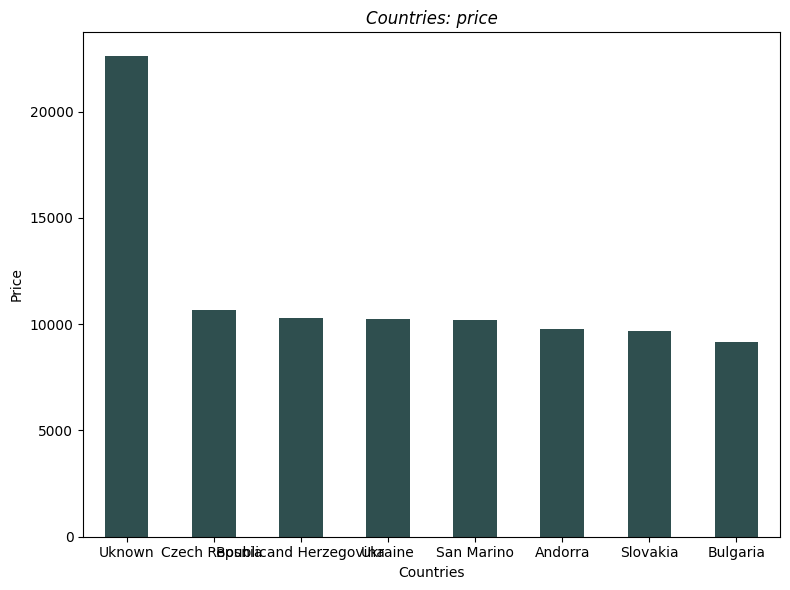

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
countries_price.head(8).plot(kind="bar", color="DarkSlateGrey", fontsize=10)
plt.title("Countries: price", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of revenue by regions
region_rev = events.groupby("region")["revenue"].sum().sort_values(ascending=False)
print(region_rev)

region
Europe    1.508147e+09
Uknown    1.031456e+08
Asia      9.333089e+07
Name: revenue, dtype: float64


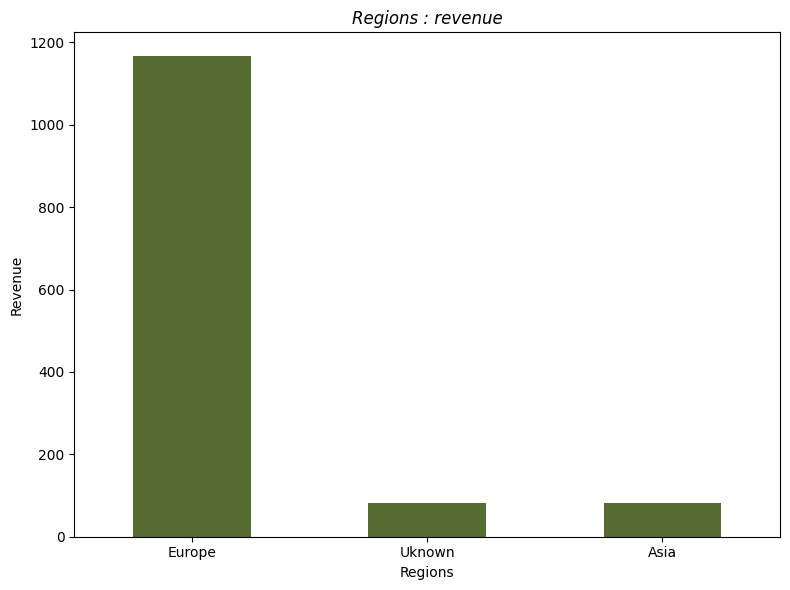

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
regions_cnt.plot(kind="bar", color="DarkOliveGreen", fontsize=10)
plt.title("Regions : revenue", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of sold units by regions
region_sold = events.groupby("region")["Units Sold"].sum().sort_values(ascending=False)
print(region_sold)

region
Europe    5.771148e+06
Asia      4.104270e+05
Uknown    4.048530e+05
Name: Units Sold, dtype: float64


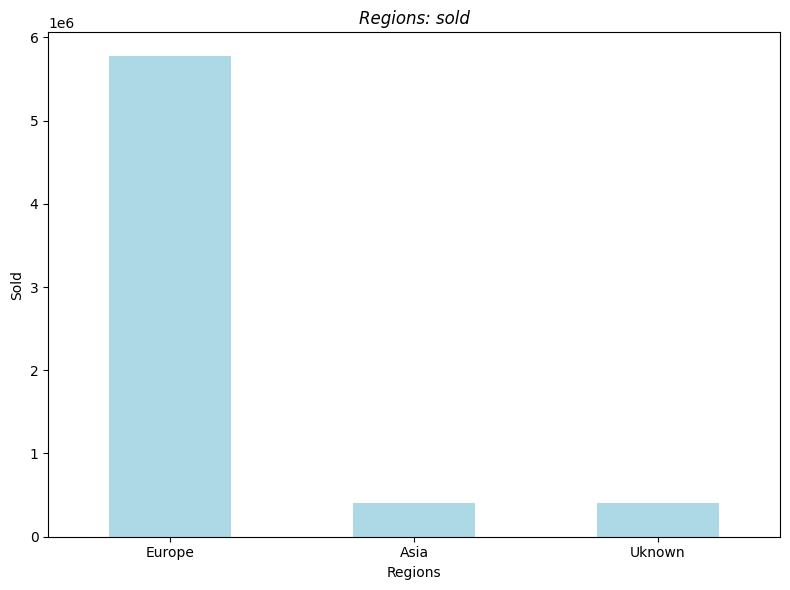

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
region_sold.plot(kind="bar", color="LightBlue", fontsize=10)
plt.title("Regions: sold", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of price by region
region_price = events.groupby("region")["Unit Price"].sum().sort_values(ascending=False)
print(region_price)

region
Europe    310963.51
Uknown     22607.37
Asia       18737.53
Name: Unit Price, dtype: float64


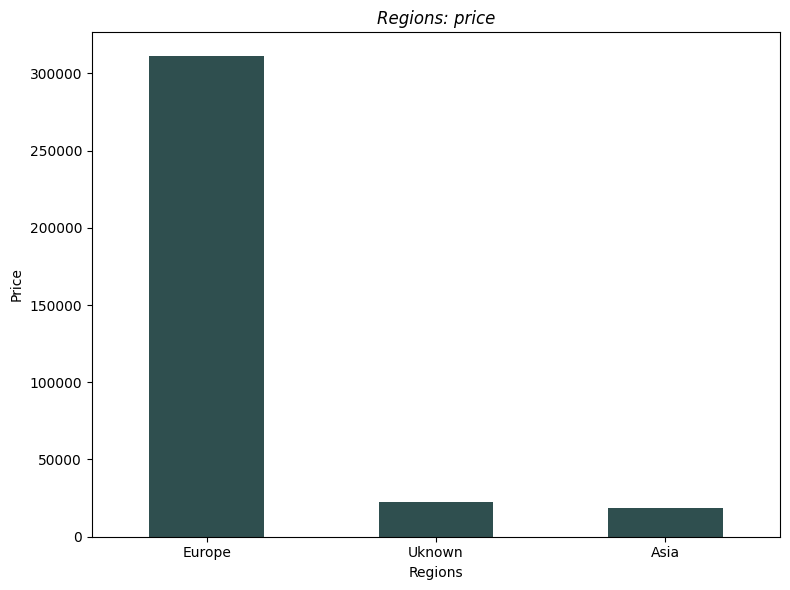

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
region_price.plot(kind="bar", color="DarkSlateGrey", fontsize=10)
plt.title("Regions: price", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of cost by region
region_cost = events.groupby("region")["Unit Cost"].sum().sort_values(ascending=False)
print(region_cost)

region
Europe    219082.51
Uknown     16474.53
Asia       13481.22
Name: Unit Cost, dtype: float64


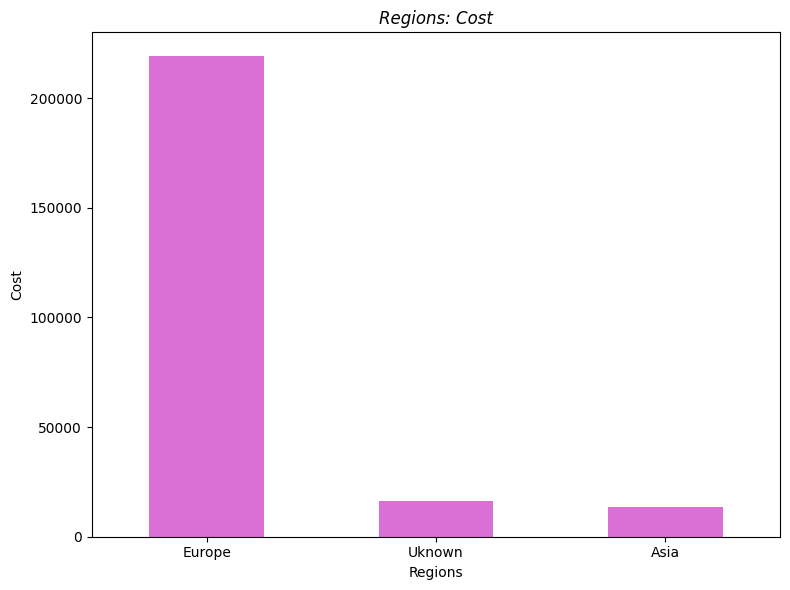

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
region_cost.plot(kind="bar", color="Orchid", fontsize=10)
plt.title("Regions: Cost", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Cost")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of revenue by sub-region
sub_region_rev = events.groupby("sub-region")["revenue"].sum().sort_values(ascending=False)
print(sub_region_rev)

sub-region
Southern Europe    5.645263e+08
Eastern Europe     3.786865e+08
Northern Europe    2.964108e+08
Western Europe     2.685233e+08
Uknown             1.031456e+08
Western Asia       9.333089e+07
Name: revenue, dtype: float64


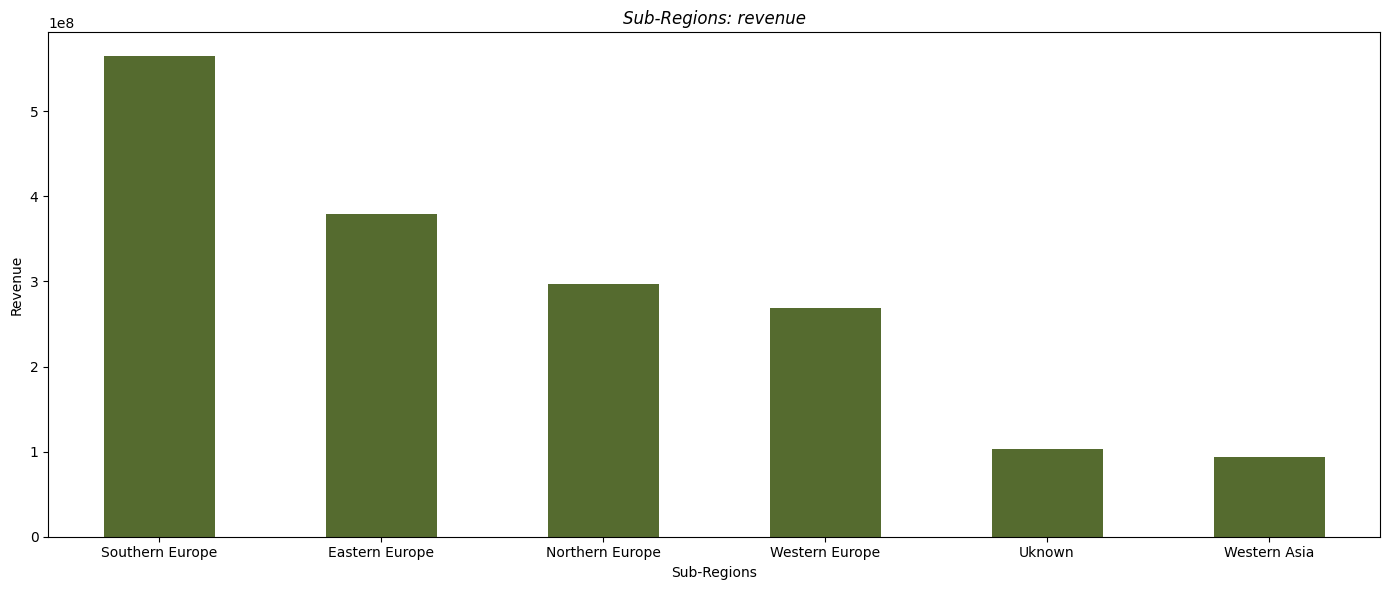

In [ ]:
# Visualising
plt.figure(figsize=(14, 6))
sub_region_rev.plot(kind="bar", color="DarkOliveGreen", fontsize=10)
plt.title("Sub-Regions: revenue", fontstyle="italic")
plt.xlabel("Sub-Regions")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of sold units by sub-region
sub_region_sold = events.groupby("sub-region")["Units Sold"].sum().sort_values(ascending=False)
print(sub_region_sold)

sub-region
Southern Europe    2.136257e+06
Eastern Europe     1.349811e+06
Northern Europe    1.244958e+06
Western Europe     1.040122e+06
Western Asia       4.104270e+05
Uknown             4.048530e+05
Name: Units Sold, dtype: float64


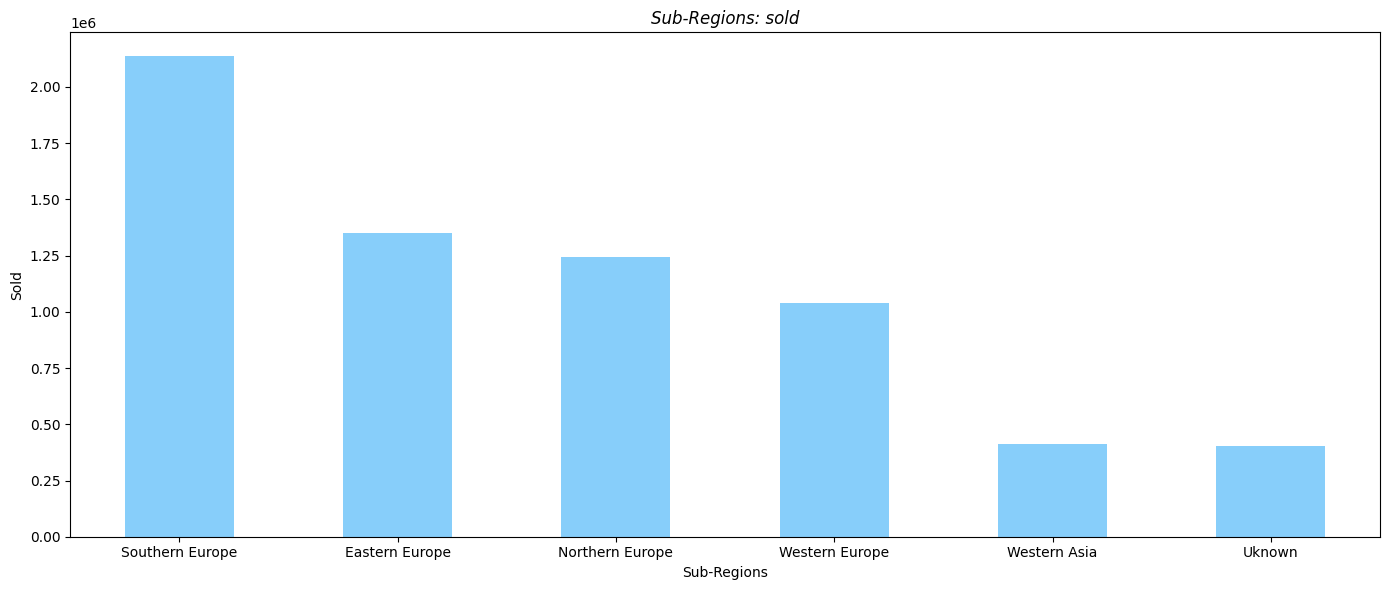

In [ ]:
# Visualising
plt.figure(figsize=(14, 6))
sub_region_sold.plot(kind="bar", color="LightSkyBlue", fontsize=10)
plt.title("Sub-Regions: sold", fontstyle="italic")
plt.xlabel("Sub-Regions")
plt.ylabel("Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of price by sub-region
sub_region_price = events.groupby("sub-region")["Unit Price"].sum().sort_values(ascending=False)
print(sub_region_price)

sub-region
Southern Europe    109651.10
Eastern Europe      76797.17
Northern Europe     65247.16
Western Europe      59268.08
Uknown              22607.37
Western Asia        18737.53
Name: Unit Price, dtype: float64


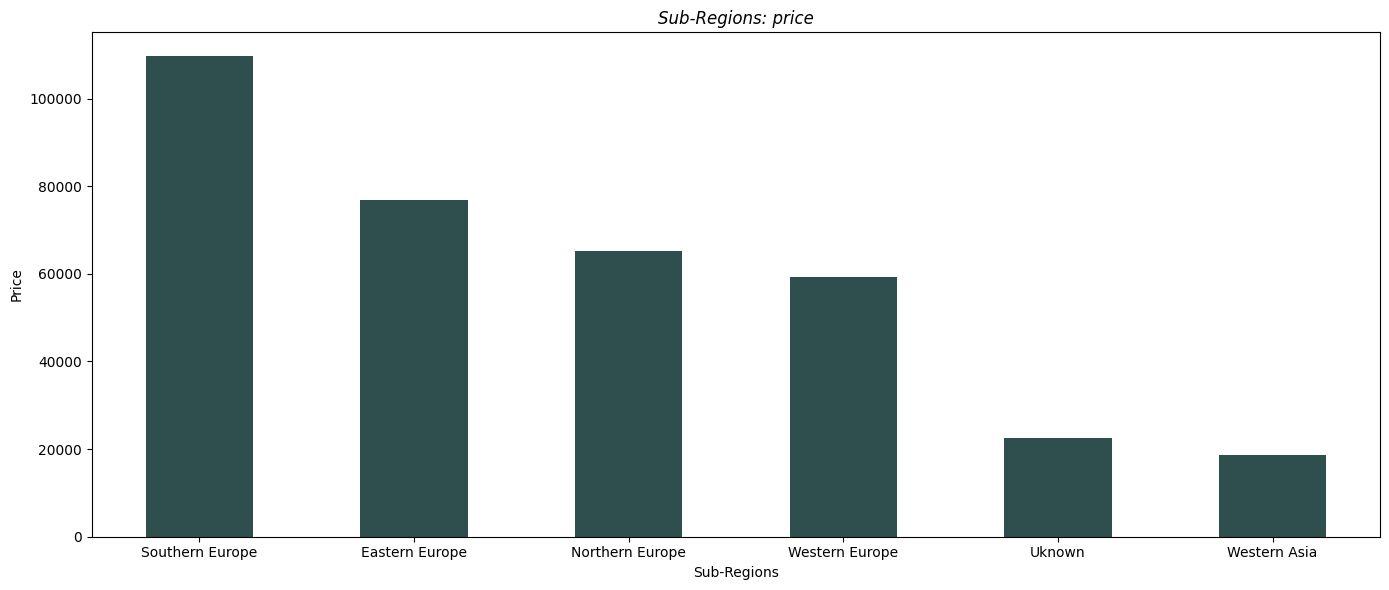

In [ ]:
# Visualising
plt.figure(figsize=(14, 6))
sub_region_price.plot(kind="bar", color="DarkSlateGrey", fontsize=10)
plt.title("Sub-Regions: price", fontstyle="italic")
plt.xlabel("Sub-Regions")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of cost by sub-region
sub_region_cost = events.groupby("sub-region")["Unit Cost"].sum().sort_values(ascending=False)
print(sub_region_cost)

sub-region
Southern Europe    77209.77
Eastern Europe     54455.50
Northern Europe    45205.25
Western Europe     42211.99
Uknown             16474.53
Western Asia       13481.22
Name: Unit Cost, dtype: float64


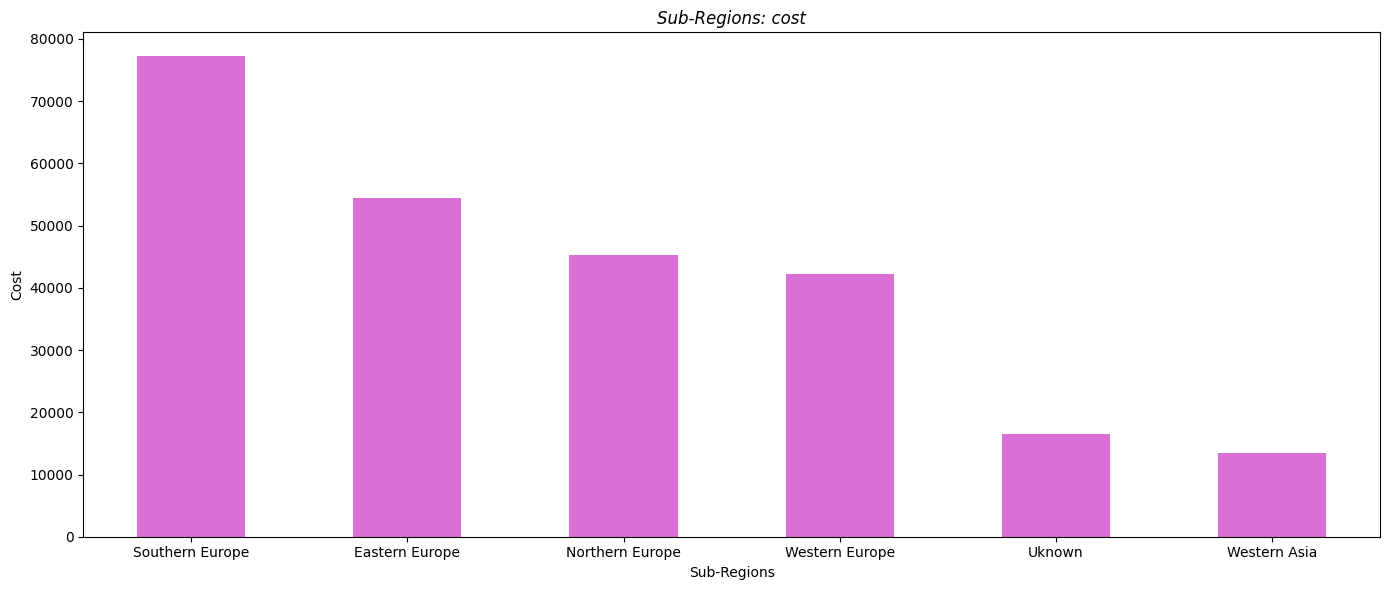

In [ ]:
# Visualising
plt.figure(figsize=(14, 6))
sub_region_cost.plot(kind="bar", color="Orchid", fontsize=10)
plt.title("Sub-Regions: cost", fontstyle="italic")
plt.xlabel("Sub-Regions")
plt.ylabel("Cost")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Check
events["Sales Channel"].unique()

array(['Online', 'Offline', 'online'], dtype=object)

In [ ]:
# formating the values to reduce an extra column
events["Sales Channel"] = events["Sales Channel"].str.lower()

In [ ]:
# Sum of revenue by channel
channel_rev = events.groupby("Sales Channel")["revenue"].sum().sort_values(ascending=False)
print(channel_rev)

Sales Channel
offline    8.742547e+08
online     8.303688e+08
Name: revenue, dtype: float64


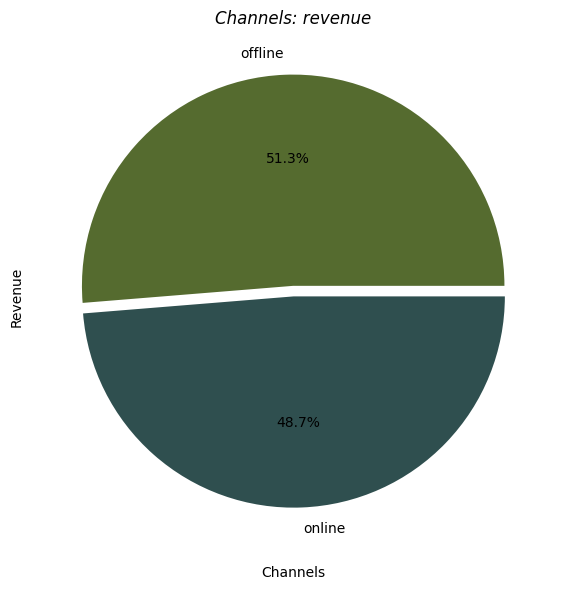

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
myexplode = [0.05, 0]
mycolors = ['DarkOliveGreen', 'DarkSlateGrey']
channel_rev.plot(kind="pie", colors = mycolors, explode = myexplode, autopct='%1.1f%%')
plt.title("Channels: revenue", fontstyle="italic")
plt.xlabel("Channels")
plt.ylabel("Revenue")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of sold units by channel
channel_sold = events.groupby("Sales Channel")["Units Sold"].sum().sort_values(ascending=False)
print(channel_sold)

Sales Channel
offline    3.330267e+06
online     3.256161e+06
Name: Units Sold, dtype: float64


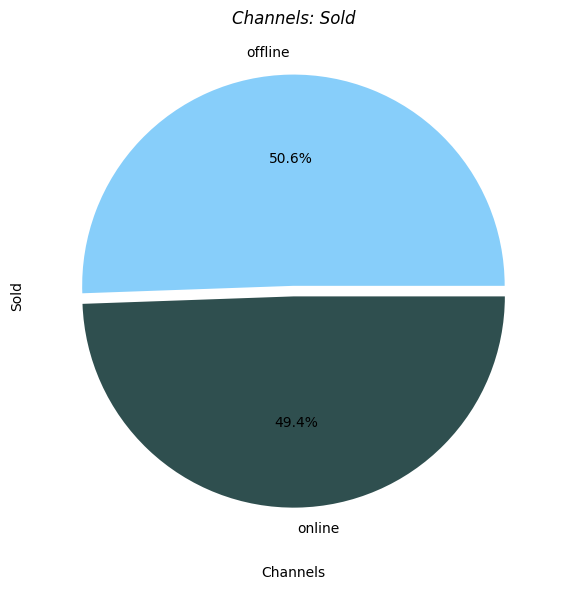

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
myexplode = [0.05, 0]
mycolors = ['LightSkyBlue', 'DarkSlateGrey']
channel_sold.plot(kind="pie", colors = mycolors, explode = myexplode, autopct='%1.1f%%')
plt.title("Channels: Sold", fontstyle="italic")
plt.xlabel("Channels")
plt.ylabel("Sold")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of price by channel
channel_price = events.groupby("Sales Channel")["Unit Price"].sum().sort_values(ascending=False)
print(channel_price)

Sales Channel
online     176888.22
offline    175420.19
Name: Unit Price, dtype: float64


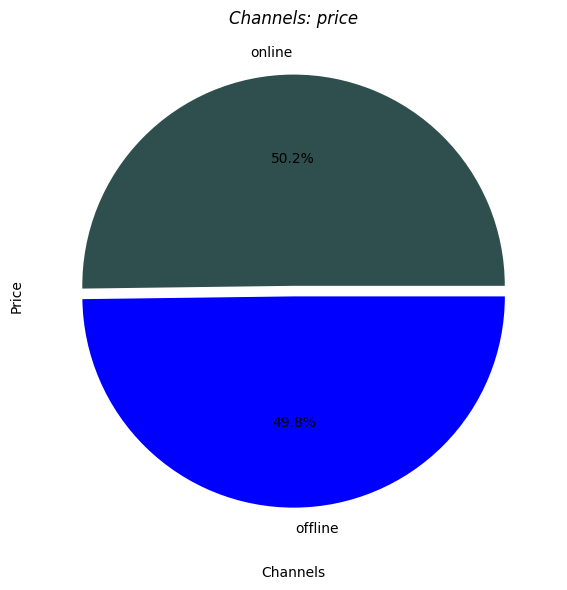

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
myexplode = [0.05, 0]
mycolors = ['DarkSlateGrey', 'Blue']
channel_price.plot(kind="pie", colors = mycolors, explode = myexplode, autopct='%1.1f%%')
plt.title("Channels: price", fontstyle="italic")
plt.xlabel("Channels")
plt.ylabel("Price")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Sum of cost by channel
channel_cost = events.groupby("Sales Channel")["Unit Cost"].sum().sort_values(ascending=False)
print(channel_cost)

Sales Channel
online     124898.29
offline    124139.97
Name: Unit Cost, dtype: float64


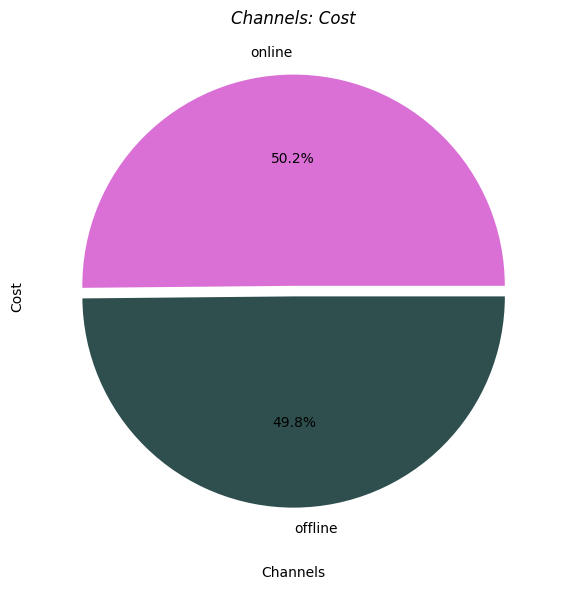

In [ ]:
# Visualising
plt.figure(figsize=(8, 6))
myexplode = [0.05, 0]
mycolors = ['Orchid', 'DarkSlateGrey']
channel_cost.plot(kind="pie", colors = mycolors, explode = myexplode, autopct='%1.1f%%')
plt.title("Channels: Cost", fontstyle="italic")
plt.xlabel("Channels")
plt.ylabel("Cost")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Creating the columns by separating data from the column of time for future analysis
events["month"] = events['Order Date'].dt.month
events["day_of_the_week"] = events['Order Date'].dt.day_of_week
events["year"] = events['Order Date'].dt.year

/tmp/ipython-input-2313987072.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


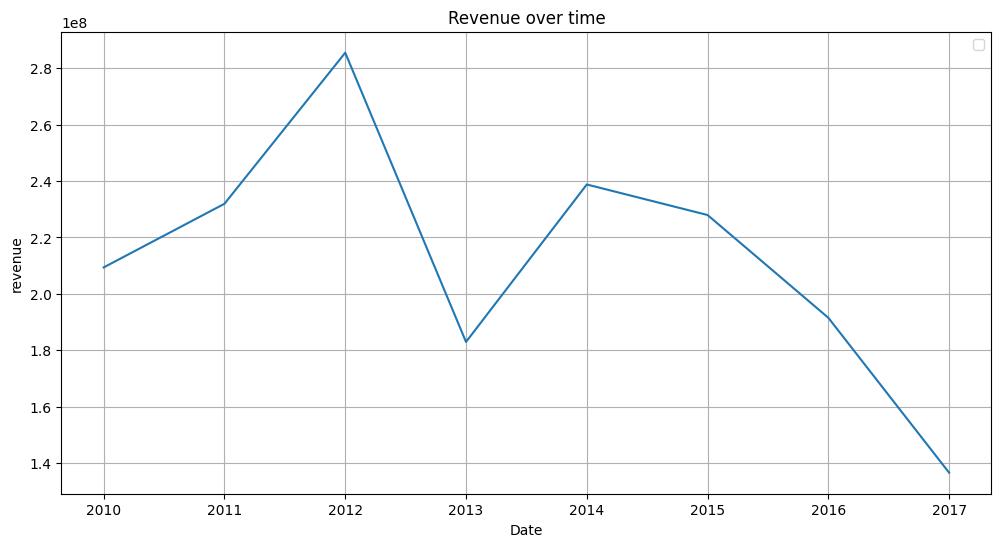

In [ ]:
# Visualising the revenue distribution by time(years)
time = events.groupby("year")["revenue"].sum()
plt.figure(figsize=(12, 6))
plt.plot(time.index, time.values)
plt.xlabel("Date")
plt.ylabel("revenue")
plt.title("Revenue over time")
plt.legend()
plt.grid(True)
plt.show()

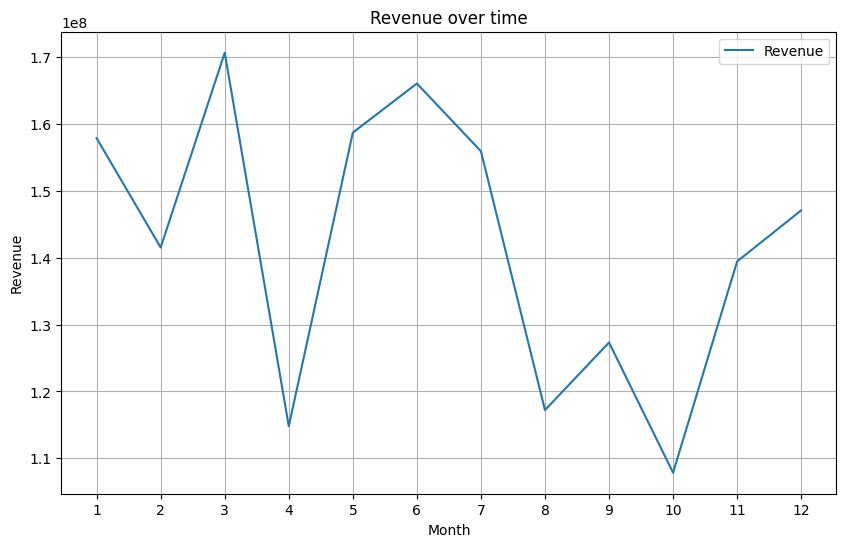

In [ ]:
# Visualising the revenue distribution by time(months)
month_revenue = events.groupby("month")["revenue"].sum()
month_revenue = month_revenue.reindex(range(1, 13))
plt.figure(figsize=(10, 6))
plt.plot(month_revenue.index, month_revenue.values, label="Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue over time")
plt.xticks((range(1, 13)))
plt.legend()
plt.grid(True)
plt.show()

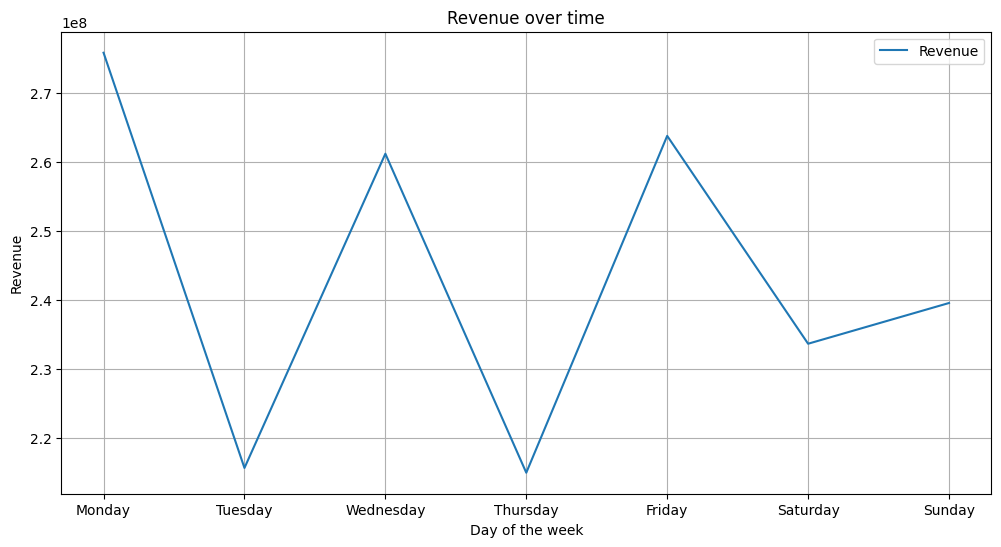

In [ ]:
# Visualising the revenue distribution by time(days of the week)
day_revenue = events.groupby("day_of_the_week")["revenue"].sum()
day_revenue.index = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
plt.figure(figsize=(12, 6))
plt.plot(day_revenue.index, day_revenue.values, label="Revenue")
plt.xlabel("Day of the week")
plt.ylabel("Revenue")
plt.title("Revenue over time")
plt.legend()
plt.grid(True)
plt.show()

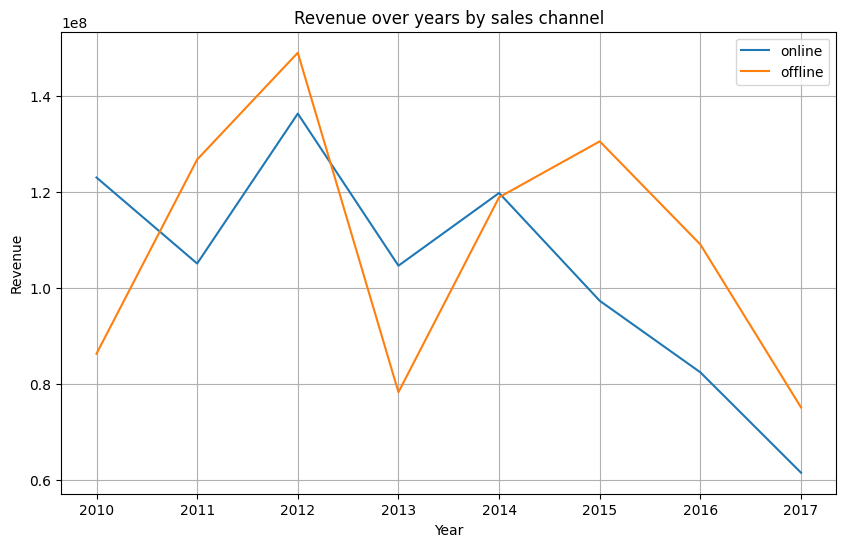

In [ ]:
# Visualising the revenue distribution over time(years) by channels
channel_grouped_y = events.groupby(["year", "Sales Channel"])["revenue"].sum().reset_index()
channels = events["Sales Channel"].unique()
plt.figure(figsize=(10, 6))
for channel in channels:
    data = channel_grouped_y[channel_grouped_y["Sales Channel"] == channel]
    plt.plot(data["year"], data["revenue"], label=channel)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue over years by sales channel')
plt.legend()
plt.grid(True)
plt.show()

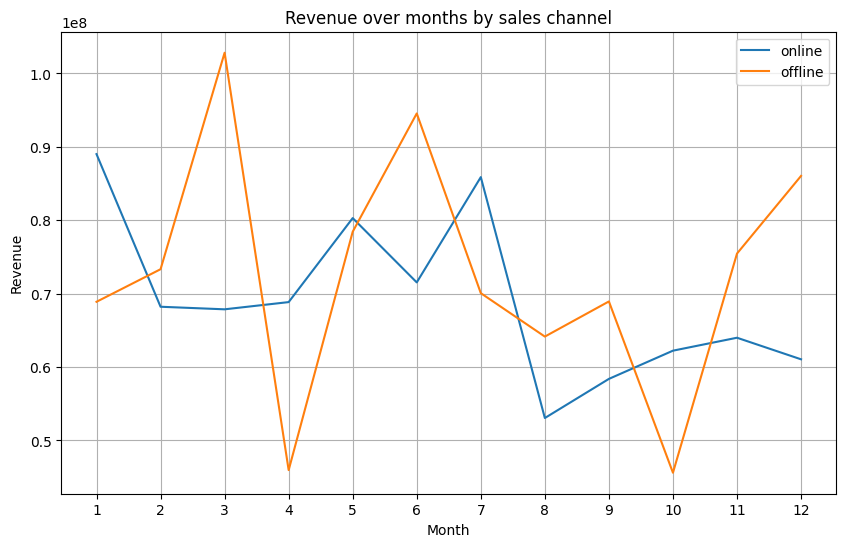

In [ ]:
# Visualising the revenue distribution over time(months) by channels
channel_grouped = events.groupby(["month", "Sales Channel"])["revenue"].sum().reset_index()
channels = events["Sales Channel"].unique()
plt.figure(figsize=(10, 6))
for channel in channels:
    data = channel_grouped[channel_grouped["Sales Channel"] == channel]
    plt.plot(data["month"], data["revenue"], label=channel)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue over months by sales channel')
plt.legend()
plt.grid(True)
plt.xticks((range(1, 13)))
plt.show()


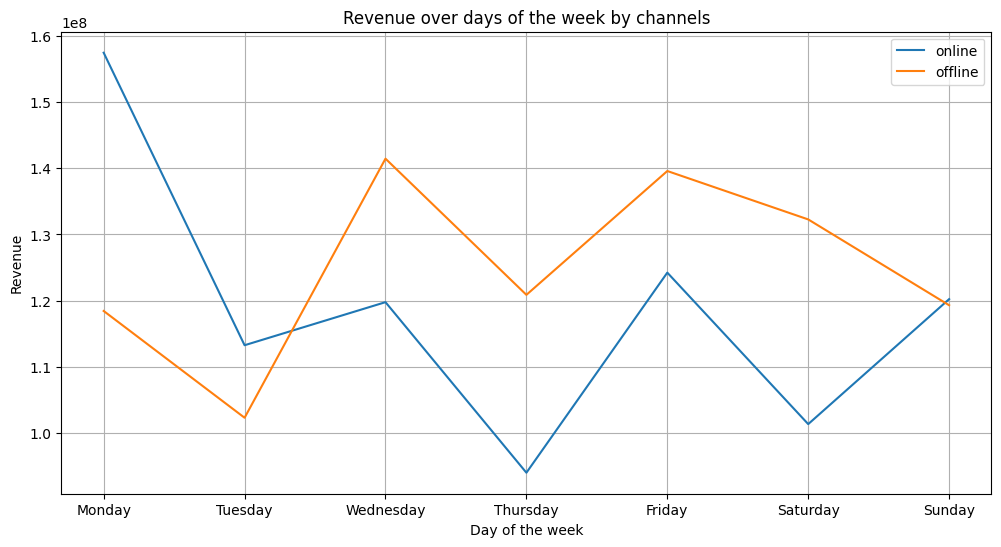

In [ ]:
# Visualising the revenue distribution over time(days) by channels
channel_grouped_day = events.groupby(["day_of_the_week", "Sales Channel"])["revenue"].sum().reset_index()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
channel_grouped_day["day_of_the_week"] = channel_grouped_day["day_of_the_week"].map(dict(enumerate(days)))
channels = events["Sales Channel"].unique()
channels = events["Sales Channel"].unique()
plt.figure(figsize=(12, 6))
for channel in channels:
    data = channel_grouped_day[channel_grouped_day["Sales Channel"] == channel]
    plt.plot(data["day_of_the_week"], data["revenue"], label=channel)
plt.xlabel('Day of the week')
plt.ylabel('Revenue')
plt.title('Revenue over days of the week by channels')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Creating the column with ageing
events["ageing"] = events['Ship Date'] - events['Order Date']
events["ageing"] = events["ageing"].dt.days
events.head()

,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,alpha-2,region,sub-region,revenue,month,day_of_the_week,year,ageing
0,100640618,2014-10-08,2014-10-18,M,NOR,2103,online,650.0,205.70,117.11,Cereal,Norway,NO,Europe,Northern Europe,133705.00,10,2,2014,10
1,100983083,2016-08-11,2016-08-11,C,SRB,2103,offline,1993.0,205.70,117.11,Cereal,Serbia,RS,Europe,Southern Europe,409960.10,8,3,2016,0
2,101025998,2014-07-18,2014-08-11,M,Uknown,7940,online,4693.0,668.27,502.54,Household,Uknown,Uknown,Uknown,Uknown,3136191.11,7,4,2014,24
3,102230632,2017-05-13,2017-06-13,L,MNE,2455,online,1171.0,109.28,35.84,Clothes,Montenegro,ME,Europe,Southern Europe,127966.88,5,5,2017,31
4,103435266,2012-08-11,2012-09-18,H,SRB,1270,offline,7648.0,47.45,31.79,Beverages,Serbia,RS,Europe,Southern Europe,362897.60,8,5,2012,38


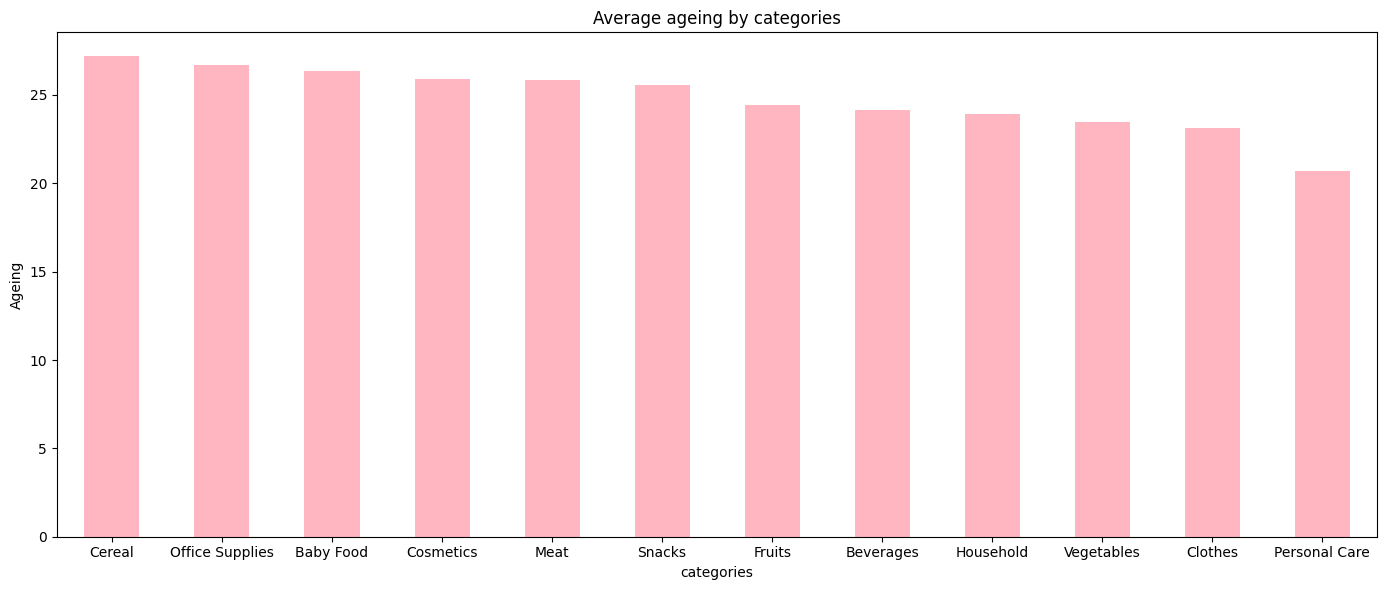

In [ ]:
# Visualising the avg ageing by categories
plt.figure(figsize=(14, 6))
categoriea_ageing = events.groupby("item_type")["ageing"].mean().sort_values(ascending=False)
categoriea_ageing.plot(kind="bar", color="LightPink")
plt.title("Average ageing by categories")
plt.xlabel("categories")
plt.ylabel("Ageing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

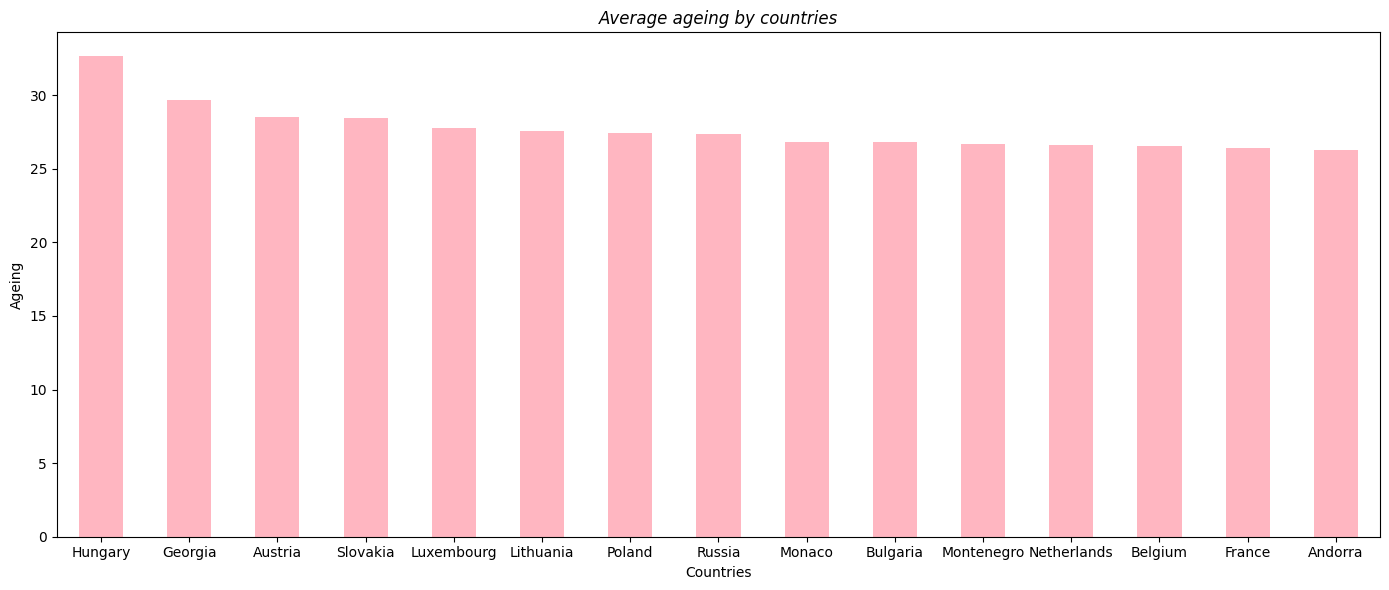

In [ ]:
# Visualising the avg ageing by countries with the longest delivery (15 countries)
plt.figure(figsize=(14, 6))
countries_ageing = events.groupby("name")["ageing"].mean().sort_values(ascending=False)
countries_ageing.head(15).plot(kind="bar",  color="LightPink", fontsize=10)
plt.title("Average ageing by countries", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Ageing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

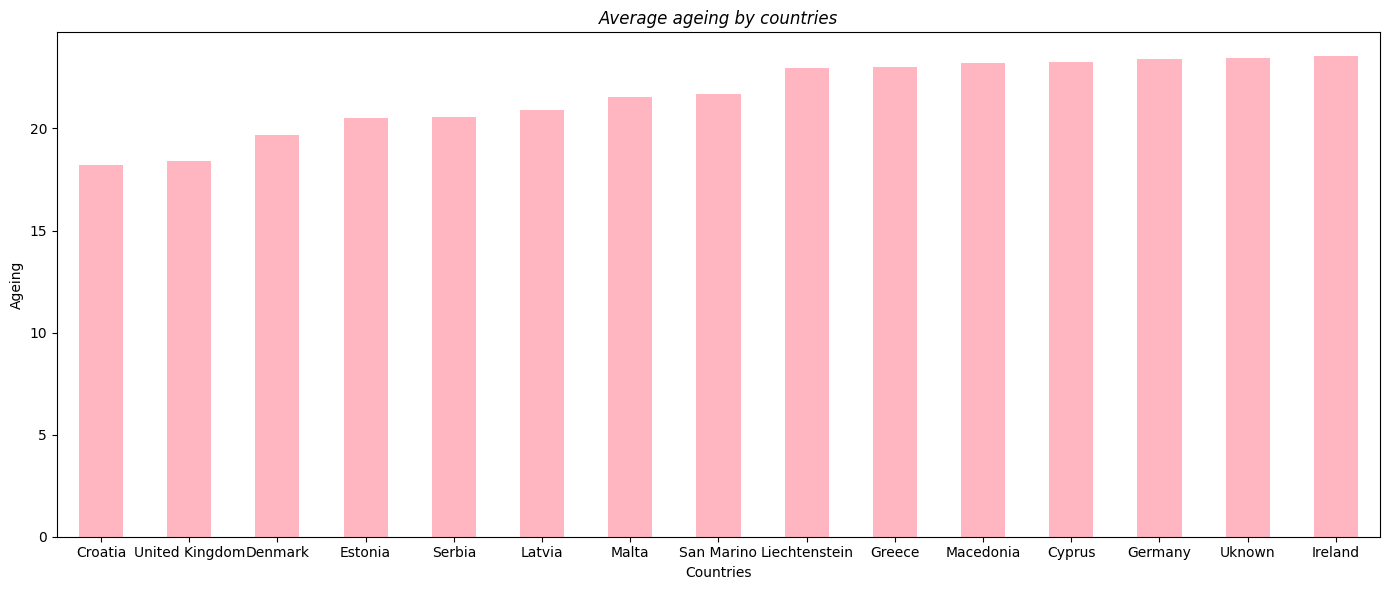

In [ ]:
# Visualising the avg ageing by countries with the fastest delivery (15 countries)
plt.figure(figsize=(14, 6))
countries_ageing = events.groupby("name")["ageing"].mean().sort_values(ascending=True)
countries_ageing.head(15).plot(kind="bar",  color="LightPink", fontsize=10)
plt.title("Average ageing by countries", fontstyle="italic")
plt.xlabel("Countries")
plt.ylabel("Ageing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

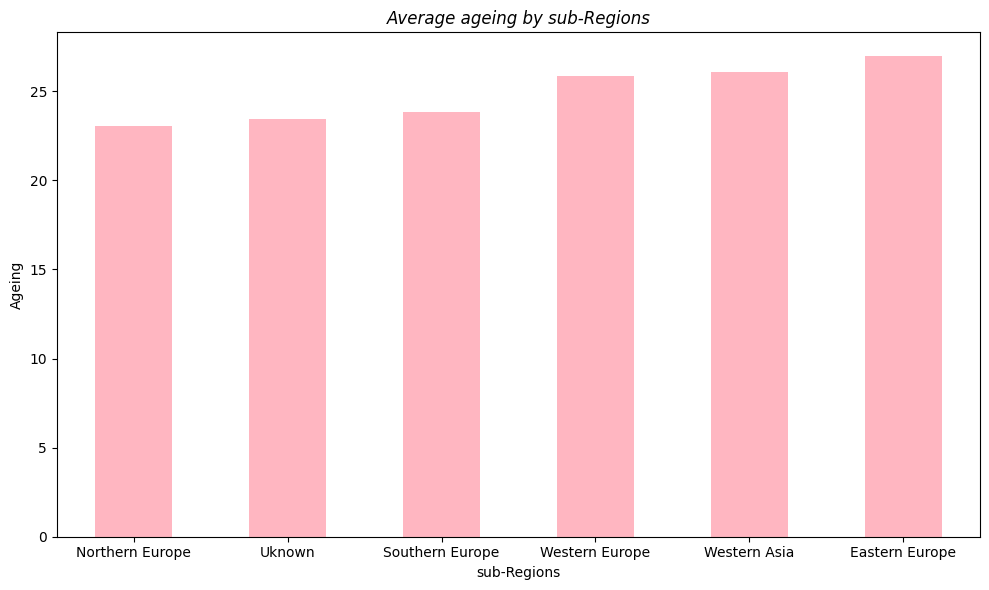

In [ ]:
plt.figure(figsize=(10, 6))
reg_ageing = events.groupby("sub-region")["ageing"].mean().sort_values(ascending=True)
reg_ageing.plot(kind="bar",  color="LightPink", fontsize=10)
plt.title("Average ageing by sub-Regions", fontstyle="italic")
plt.xlabel("sub-Regions")
plt.ylabel("Ageing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

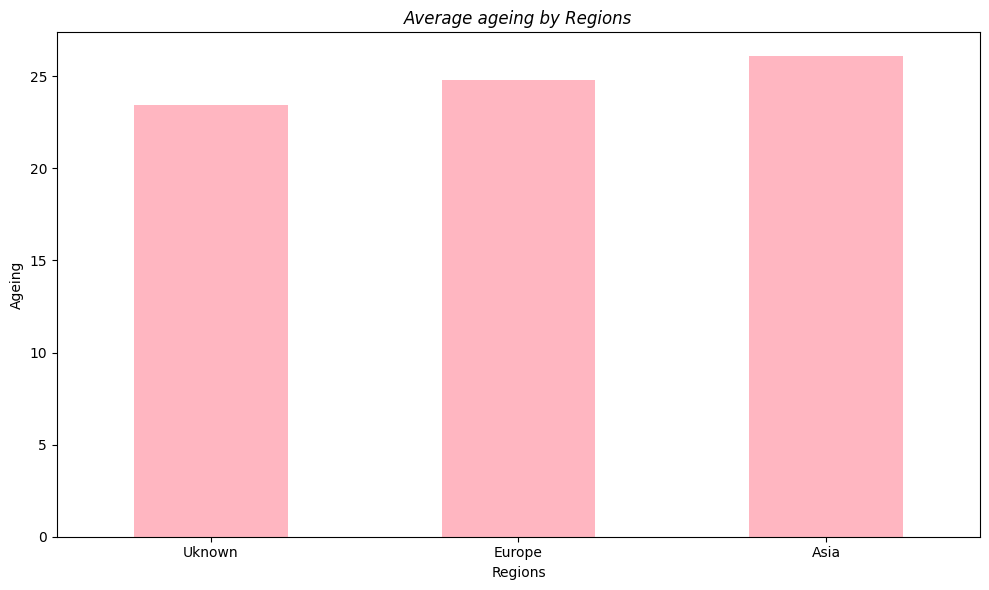

In [ ]:
# Visualising the avg ageing by regions
plt.figure(figsize=(10, 6))
reg_ageing = events.groupby("region")["ageing"].mean().sort_values(ascending=True)
reg_ageing.plot(kind="bar",  color="LightPink", fontsize=10)
plt.title("Average ageing by Regions", fontstyle="italic")
plt.xlabel("Regions")
plt.ylabel("Ageing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

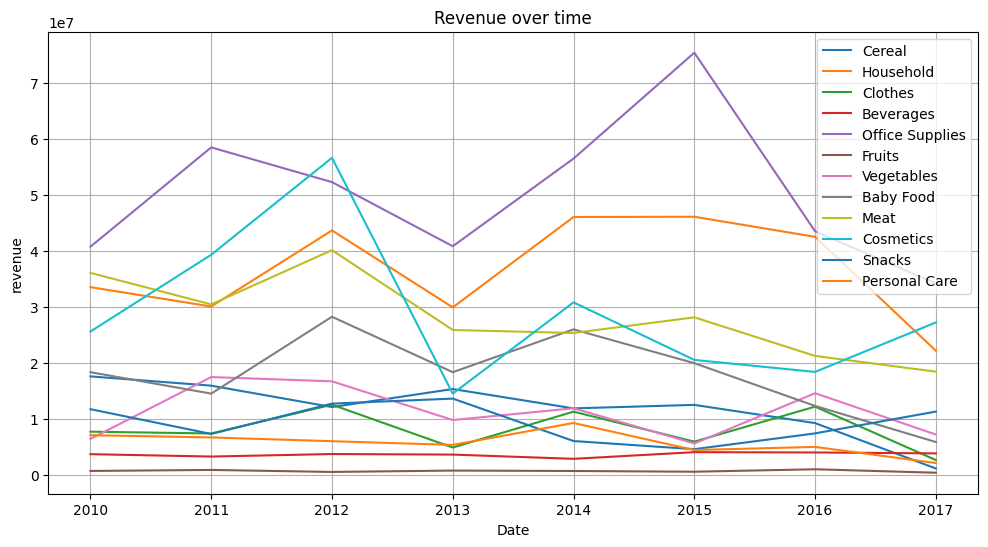

In [ ]:
categories_grouped_year = events.groupby(["year", "item_type"])["revenue"].sum().reset_index()
categories = events["item_type"].unique()
plt.figure(figsize=(12, 6))
for category in categories:
    data = categories_grouped_year[categories_grouped_year["item_type"] == category]
    plt.plot(data["year"], data["revenue"], label=category)
plt.xlabel("Date")
plt.ylabel("revenue")
plt.title("Revenue over time")
plt.legend()
plt.grid(True)
plt.show()

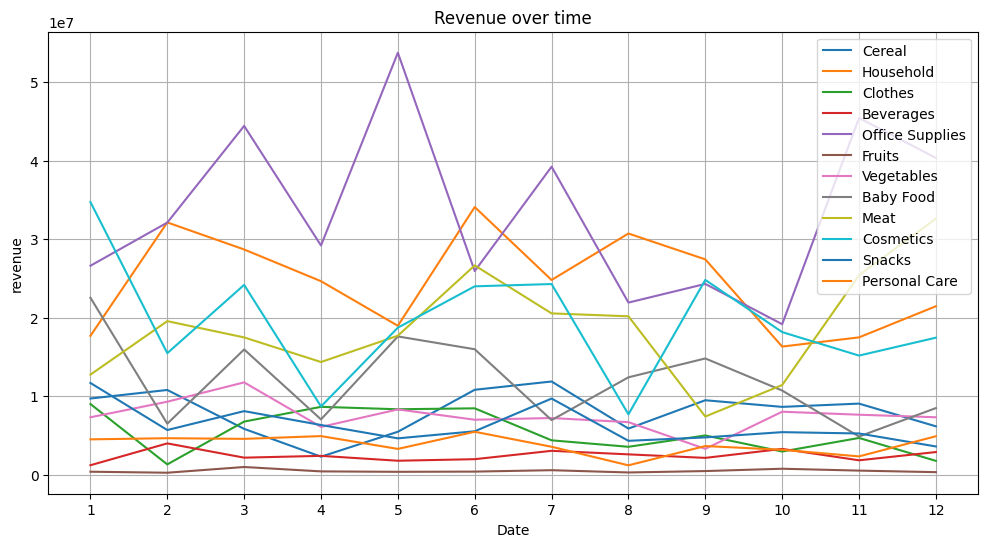

In [ ]:
categories_grouped_year = events.groupby(["month", "item_type"])["revenue"].sum().reset_index()
categories = events["item_type"].unique()
plt.figure(figsize=(12, 6))
for category in categories:
    data = categories_grouped_year[categories_grouped_year["item_type"] == category]
    plt.plot(data["month"], data["revenue"], label=category)
plt.xlabel("Date")
plt.ylabel("revenue")
plt.title("Revenue over time")
plt.legend()
plt.grid(True)
plt.xticks((range(1, 13)))
plt.show()

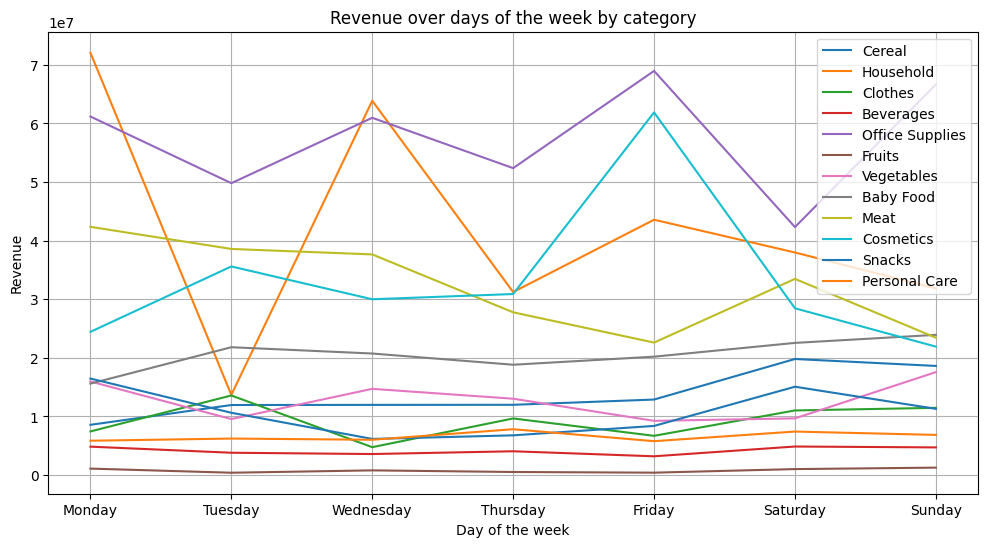

In [ ]:
# Visualising the revenue over week by categories
categories_grouped_day = events.groupby(["day_of_the_week", "item_type"])["revenue"].sum().reset_index()
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
categories_grouped_day["day_of_the_week"] = categories_grouped_day["day_of_the_week"].map(dict(enumerate(days)))
categories = events["item_type"].unique()
plt.figure(figsize=(12, 6))
for category in categories:
    data = categories_grouped_day[categories_grouped_day["item_type"] == category]
    plt.plot(data["day_of_the_week"], data["revenue"], label=category)
plt.xlabel('Day of the week')
plt.ylabel('Revenue')
plt.title('Revenue over days of the week by category')
plt.legend()
plt.grid(True)
plt.show()

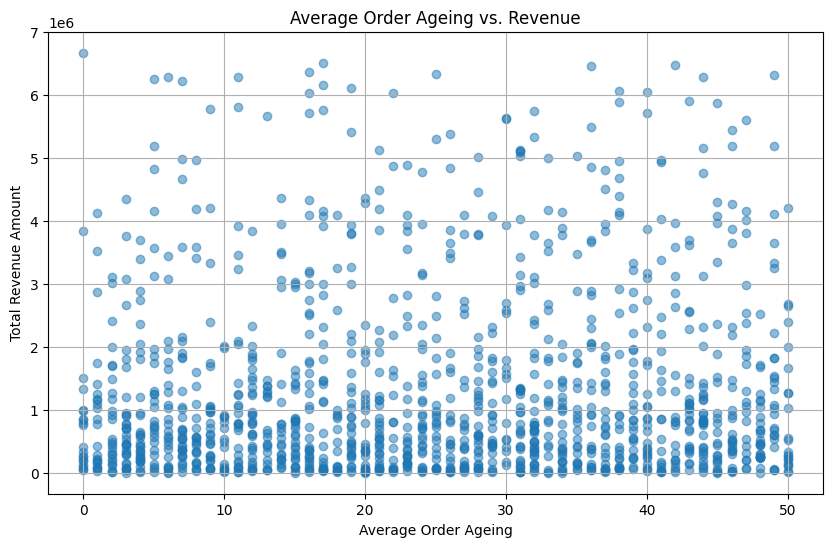

In [ ]:
# Check the correlation between the revenue and the ageing
avg_ageing = events.groupby("Order ID")["ageing"].mean()
avg_ageing_rev = events.groupby("Order ID")["revenue"].sum()
plt.figure(figsize=(10, 6))
plt.scatter(avg_ageing, avg_ageing_rev, alpha=0.5)
plt.xlabel("Average Order Ageing")
plt.ylabel("Total Revenue Amount")
plt.title("Average Order Ageing vs. Revenue")
plt.grid(True)
plt.show()

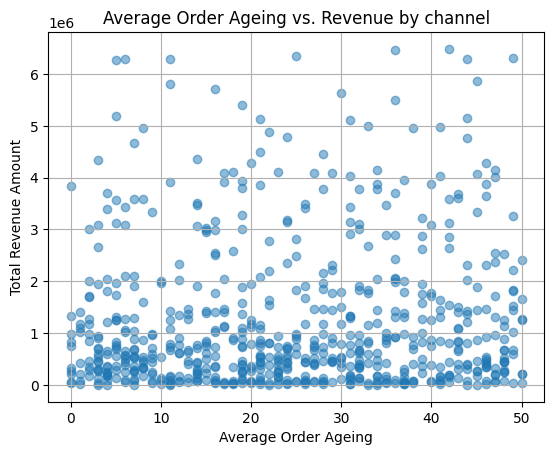

In [ ]:
# Check the correlation between the revenue and the ageing by channels(online)
channels = events[events["Sales Channel"] == "online"]
aging_by_channel = channels.groupby(["Order ID", "Sales Channel"])["ageing"].mean()
aging_by_channel_rev = channels.groupby(["Order ID", "Sales Channel"])["revenue"].sum()
plt.scatter(aging_by_channel, aging_by_channel_rev, alpha=0.5)
plt.xlabel("Average Order Ageing")
plt.ylabel("Total Revenue Amount")
plt.title("Average Order Ageing vs. Revenue by channel")
plt.grid(True)
plt.show()

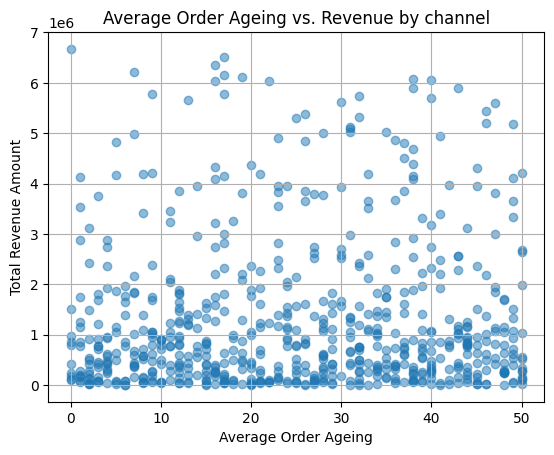

In [ ]:
# Check the correlation between the revenue and the ageing (offline)
channels_of = events[events["Sales Channel"] == "offline"]
aging_by_channel_of = channels_of.groupby(["Order ID", "Sales Channel"])["ageing"].mean()
aging_by_channel_of_rev = channels_of.groupby(["Order ID", "Sales Channel"])["revenue"].sum()
plt.scatter(aging_by_channel_of, aging_by_channel_of_rev, alpha=0.5)
plt.xlabel("Average Order Ageing")
plt.ylabel("Total Revenue Amount")
plt.title("Average Order Ageing vs. Revenue by channel")
plt.grid(True)
plt.show()

# Аналітичний звіт
*Аналіз охоплює дані зібрані протягом 7 років з 2010 до 2017.*

# Загальні показники

* Загальний прибуток - **1,704,623,436**

* Загальна кількість проданих одиничць товарів - **6,586,428**

* Загальна кількість охоплених країн - **42**

* Загальна кількість охоплених регіонів - **3**

* Загальна кількість озорлених субрегіонів - **6**

Річний розподіл: у 2010–2012 спостерігається зростання, у 2013 — різкий спад, у 2014 — нестійкий ріст, після чого тенденція чітко знижується до 2017 року. Загальний тренд — спадний

Місячний розподіл: дані коливаються без чіткої закономірності, спостерігаються різкі переходи між ростом і падінням.

Поденний розподіл: найбільші показники зафіксовані у понеділок, далі значення коливаються в межах тижня.

# Популярність категорій

* 5 найпопулярніших категорій за кількістю замовлень: *Office Supplies, Beverages, Personal Care, Cosmetics, Vegetables*

* 5 найпопулярніших категорій за кількістю проданих одиниць товарів: *Office Supplies, Beverages, Fruits, Clothes, Vegetables*

* 5 найпопулярніших категорій за прибутком: *Office Supplies, Household, Cosmetics, Meat, Baby Food*

Висновок: кількість проданих одиниць або кількість замовлень певної категорії не гарантує її прибутковість.
# Динаміка категорій

Прибуток за категоріями нестабільний. Cosmetics та Office Supplies демонструють значні коливання, ймовірно зумовлені сезонністю.

За місяцями майже всі прибуткові категорії мають виражені коливання.

За днями тижня найбільшу нестабільність показують Personal Care, Cosmetics, Office Supplies.

Виявлено кореляцію між каналом замовлення та категоріями: наприклад, спад офлайн-продажів у вівторок супроводжується падінням Personal Care; зростання офлайн-продажів у червні–липні збільшує прибуток Office Supplies.

Основний внесок у загальний прибуток забезпечила категорія Office Supplies.

# Географічний розподіл

* 5 країн з найбільшою кількістю замовлень: *Uknown, San Marino, Andorra, Romania, Ukraine*

* 5 найприбутковіших країн: *Uknown, Czech Republic, Ukraine, Bosnia and Herzegovina, Macedonia*

Лідером за обсягами є категорія Unknown, однак за регіонами “невідомий” відстає від Європи. Основний ринок сконцентрований у Європі, особливо у Південній Європі, яка впевнено лідирує за всіма показниками.

# Логістика
* Найдовший час доставки: регіон Азії.

* Найшвидший час доставки: Північна Європа.

# Висновок

Бізнес має сильну позицію у Європі з досить прибутковими позиціями, але через залежність від сезону він перебуває в мінливому стані. Слід зменшити цю залежність та звернути увагу на канали. Також категорії з великим обсягом продажів мають підвищити свою прибутковість.  Повний спад до 2017 був зумовлений зменшенням продажів від високоприбуткових категоріх, тому причина стрімкого зниження попиту потребує додаткового уточнення від зворотнього зв'язку покупців. Стосовно логістики постає оптимізація доставки в регіоні Азії. В географії треба перевірити назви невідомої країни та регіону.